In [14]:
################################################################################
# Author 1:      Daniel Schipfer 
# MatNr 1:       11723440
# Author 2:      Thomas Walchhofer
# MatNr 2:       51800280
# Author 3:      Fabian Müller
# MatNr 3:       01410690
# File:          assignment2.ipynb
# Description: ... short description of the file ...
# Comments:    ... comments for the tutors ...
#              ... can be multiline ...
################################################################################

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr # for correlation with p-value

In [16]:
def get_alcohol_data() -> pd.DataFrame:
    """
    Function to load the "alcohol"-data from the csv file into a DataFrame,
    extract the relevant alcohol-consimption values as well as the the useful colummns and name them more clearly.
    
    Returns:
        Data.Frame
    """
    #
    df_alc = pd.read_csv("alcohol_data.csv")
    df_alc = df_alc[["Reference area", "TIME_PERIOD", "OBS_VALUE"]]
    df_alc = df_alc.rename(columns={"Reference area": "country",
                    "TIME_PERIOD": "year",
                    "OBS_VALUE": "alcohol_consumption (l/person)"
                    }
    )
    return df_alc

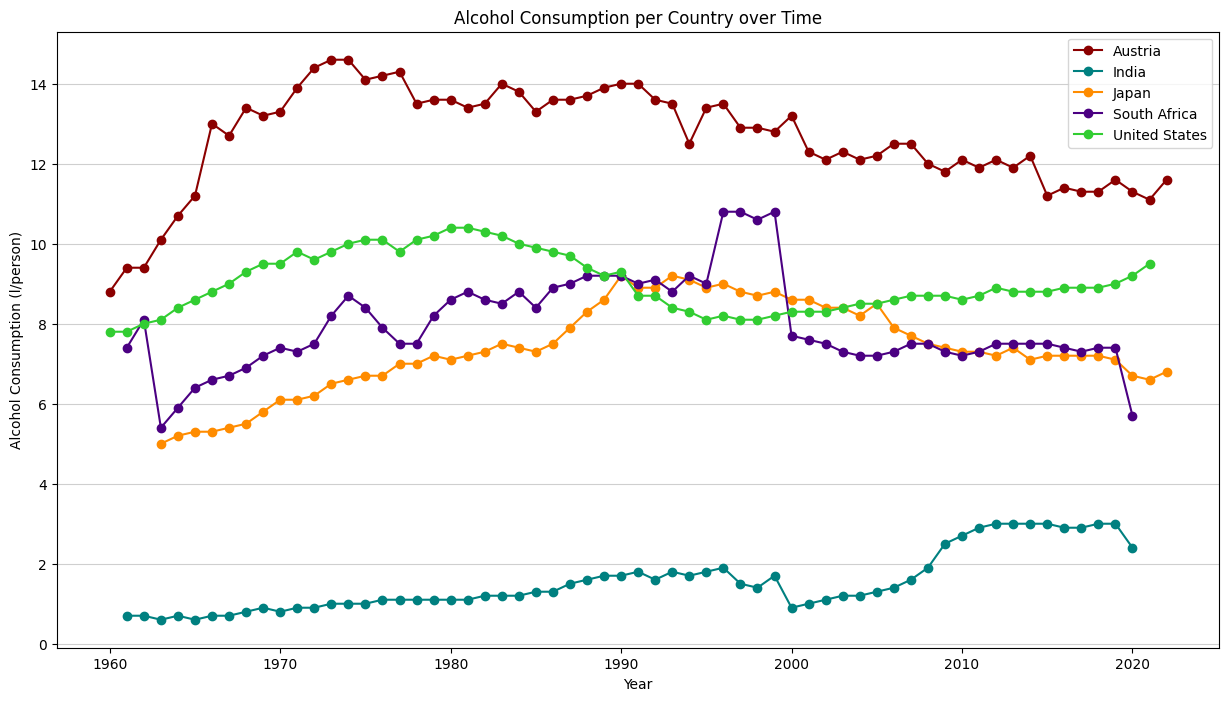

In [17]:
def line_plot(country_names: list[str],
              data: pd.DataFrame = get_alcohol_data(),
              value_column: str = "alcohol_consumption (l/person)",
              year_range: tuple[int, int] = (1960, 2024),
              title: str = None,
              y_label: str = None) -> None:
    """
    Creates a line plot displaying the values of the input DataFrame-column over a period of time (year range)
    for each specified country. 
    Default data is set to the alcohol consumption DataFrame and the default year range is set to 1960-2024.
    
    Parameters:
        country_names (list[str]): List of country names to include in the plot.
        data (pd.DataFrame): DataFrame containing the data (default is previous alcohol consumption DataFrame).
        value_column (str): Name of the Data-Frame-column with the relevant data-points (default is set for the
        previous alcohol consumption DataFrame)
        year_range (tuple[int, int]): Start and end year for the plot (default: (1960, 2024)).
        title (str): Title of the plot.
        y_label (str): Label for the y-axis.

    Returns:
        None: Displays the plot.
    """
    df_filtered = data[
        (data["country"].isin(country_names)) &
        (data["year"] >= year_range[0]) &
        (data["year"] <= year_range[1])
    ]
    
    df_pivot = df_filtered.pivot(
        index="year",
        columns="country",
        values=value_column
    )
    
    colors = ["darkred", "teal", "darkorange", "indigo", "limegreen"] if len(country_names) <= 5 else None

    df_pivot.plot(
        figsize=(15,8),
        marker="o",
        color=colors
    )

    if y_label == None:
        y_label = value_column 

    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(alpha=.6, axis="y")
    plt.show()

    return None

countries = ["Austria", "United States", "Japan", "South Africa", "India"]
line_plot(countries,
          title="Alcohol Consumption per Country over Time",
          y_label="Alcohol Consumption (l/person)")

In [18]:
def get_gini_data() -> pd.DataFrame:
    """
    Function to load the "income"-data from the csv file into a DataFrame,
    extract the relevant gini-coefficient as well as the the useful colummns and name them more clearly.
        
    Returns:
        Data.Frame
    """
    df_gini = pd.read_csv("income_data.csv")
    df_gini = df_gini.loc[(df_gini["Measure"] == "Gini (market income)") &
                          (df_gini["Age"] == "Total"), # needed so we get the total gini_coef and not by age grp
                          ["Reference area", "TIME_PERIOD", "OBS_VALUE"]]
    df_gini = df_gini.rename(columns={"Reference area": "country",
                            "TIME_PERIOD": "year",
                            "OBS_VALUE": "gini_coefficient"
                            })
    
    return df_gini

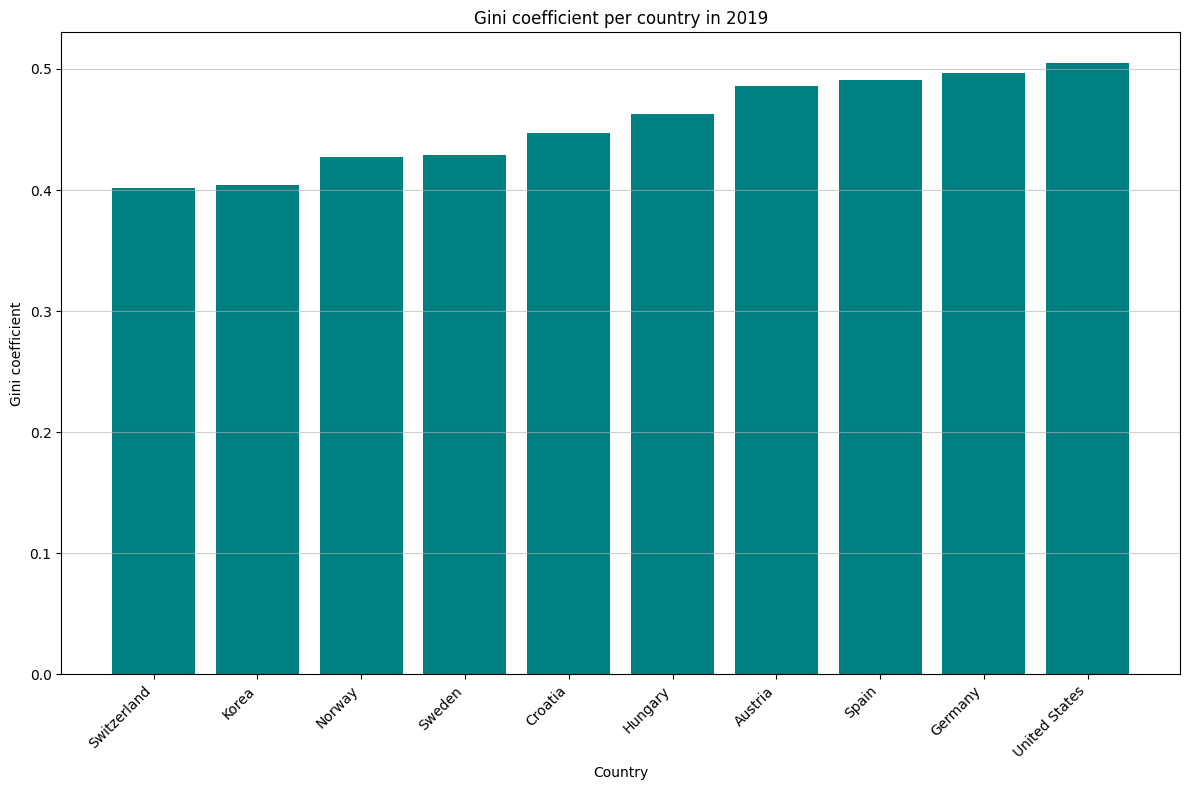

In [33]:
def bar_plot(country_names: list[str],
             data: pd.DataFrame,
             value_column: str,
             year: int,
             title: str = None,
             y_label: str = None) -> None:
    """
    Creates a bar plot displaying the values of the input DataFrame-column for each specified country.

    Parameters:
        country_names (list[str]): List of country names to include in the plot.
        data (pd.DataFrame): DataFrame containing the data.
        value_column (str): Name of the Data-Frame-column with the relevant data-points.
        year (int): Year for which the plot should be created.
        title (str): Title of the plot.
        y_label (str): Label for the y-axis.
        
    Returns:
        None: Displays the plot.
    """
    df_filtered = data[
        (data["country"].isin(country_names)) &
        (data["year"] == year)
    ]
    df_filtered = df_filtered.sort_values(value_column)
    
    plt.figure(figsize=(12,8))
    plt.bar(df_filtered["country"],
            df_filtered[value_column],
            color="teal"
    )

    if y_label == None:
        y_label = value_column

    plt.title(title)
    plt.xlabel("Country")
    plt.ylabel(y_label)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.grid(alpha=.6, axis="y")
    plt.show()

    return None

countries = ["Austria", "Hungary", "United States", "Korea", "Germany", "Croatia", "Switzerland", "Norway", "Sweden",
             "Luxemburg", "Spain"]

bar_plot(country_names=countries,
         data=get_gini_data(),
         value_column="gini_coefficient",
         year=2019,
         title="Gini coefficient per country in 2019",
         y_label="Gini coefficient"
)

In [20]:
def merge_df(data1: pd.DataFrame,
             data2: pd.DataFrame,
             on: list[str] = ["country", "year"]) -> pd.DataFrame:
    """
    Function to merge two DataFrames on the country and year columns.
    
    Returns:
        Data.Frame
    """

    df_merged = pd.merge(data1, data2, on=on, how="inner")

    return df_merged
# year=2019, country= ["Austria", "Hungary", "United States", "Korea", "Germany", "Croatia", "Switzerland", "Norway", "Sweden", "Luxemburg", "Spain"])

In [43]:
def scatter_plot(data: pd.DataFrame,
                 year: int,
                 country_names: list[str],
                 x_column: str,
                 y_column: str,
                 hue: str,
                 title: str,
                 x_label: str = None,
                 y_label: str = None) -> None:
    """
    Creates a scatter plot for the input data with colored points for each country and labels them by country name.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the data.
        year (int): Year for which the plot is supposed to be created.
        country_names (list[str]): List of country names to include in the plot.
        x_column (str): Name of the column for the x-axis.
        y_column (str): Name of the column for the y-axis.
        hue (str): Name of the column for the data-points.
        title (str): Plot title.
        x_label (str): X-axis label.
        y_label (str): Y-axis label.

    Returns:
        None: Displays the plot.
    """

    df_filtered = data[
        (data["country"].isin(country_names)) &
        (data["year"] == year)
    ]

    r, p = pearsonr(df_filtered[x_column], df_filtered[y_column])

    plt.figure(figsize=(12,8))
    
    for label in df_filtered[hue]:
        mask = df_filtered[hue] == label
        plt.scatter(
            df_filtered[x_column][mask],
            df_filtered[y_column][mask],
            label=label,
            alpha=0.9  
        )
    
    if x_label == None:
        x_label = x_column
    if y_label == None:
        y_label = y_column
    
    plt.title(f"{title}, r = {r:.2f}, p = {p:.3f}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha=.6)
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

    return None

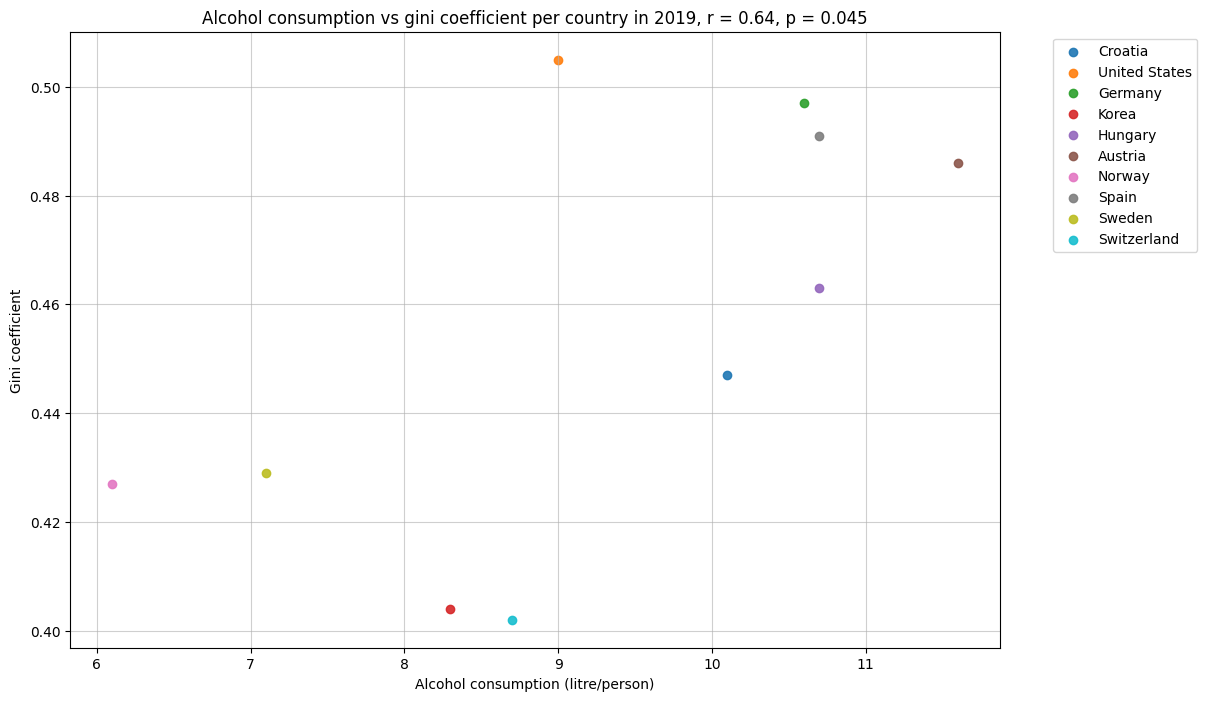

In [46]:
countries = ["Austria", "Hungary", "United States", "Korea", "Germany", "Croatia", "Switzerland", "Norway", "Sweden",
             "Luxemburg", "Spain"]
scatter_plot(data=merge_df(data1= get_alcohol_data(), data2=get_gini_data()),
             year=2019,
             country_names=countries,
             x_column="alcohol_consumption (l/person)",
             y_column="gini_coefficient",
             hue="country",
             title="Alcohol consumption vs gini coefficient per country in 2019",
             x_label="Alcohol consumption (litre/person)",
             y_label="Gini coefficient"
)

In [22]:
def get_calorie_data() -> pd.DataFrame:
    """
    Function to load the "Risk factors for health"-data from the csv file into a DataFrame,
    extract the calorie consumption data as well as the the useful colummns and name them more clearly.

    Returns:
        Data.Frame
    """

    df_kcal = pd.read_csv("OECD.ELS.HD,DSD_HEALTH_LVNG@DF_HEALTH_LVNG,+all.csv")
    df_kcal = df_kcal.loc[df_kcal["Measure"] == "Calories supply", ["Reference area", "TIME_PERIOD", "OBS_VALUE"]]
    df_kcal = df_kcal.rename(columns={"Reference area": "country",
                    "TIME_PERIOD": "year",
                    "OBS_VALUE": "kcal/person"
                    }
    )
    
    return df_kcal

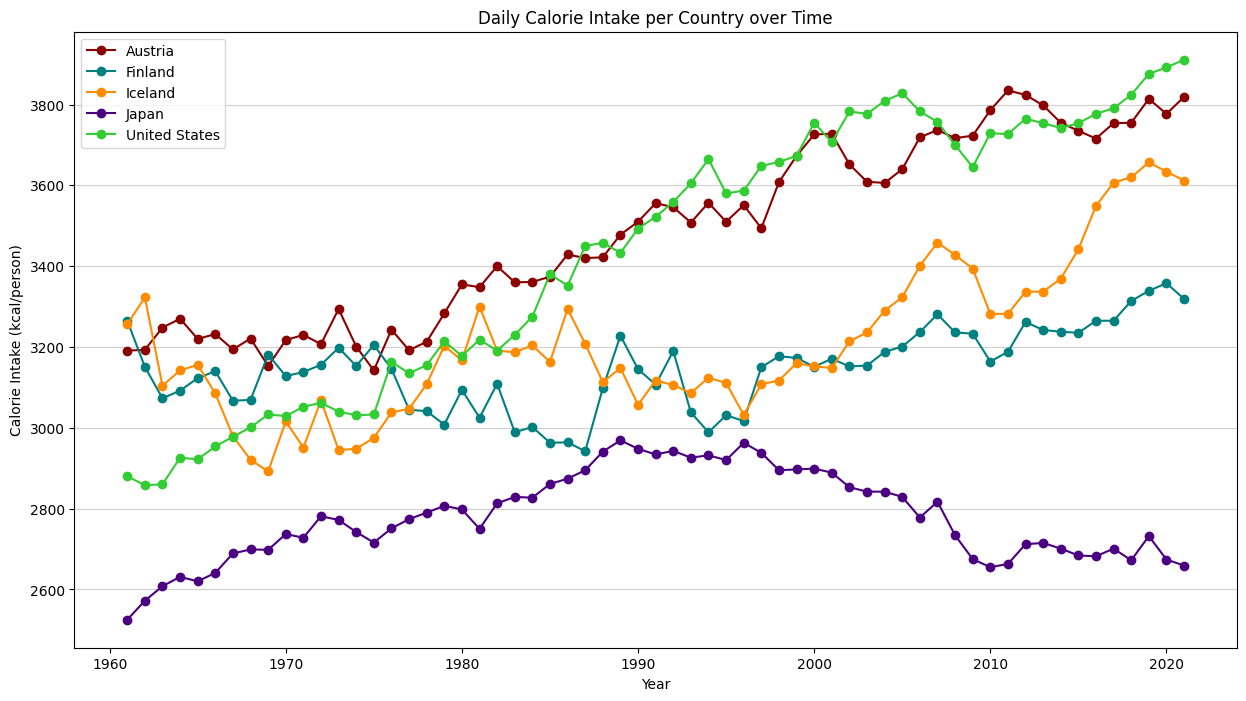

In [23]:
countries = ["Austria", "Iceland", "Finland", "United States", "Japan"]
line_plot(countries,
          data=get_calorie_data(),
          value_column="kcal/person",
          title="Daily Calorie Intake per Country over Time",
          y_label="Calorie Intake (kcal/person)")

In [24]:
def get_gdp_data() -> pd.DataFrame:
    """
    Function to load the annual GDP and consumption data from the csv file into a DataFrame,
    extract the GDP per capita values as well as the the useful colummns and name them more clearly.
    
    Returns:
        Data.Frame
    """

    df_gdp = pd.read_csv("OECD.SDD.NAD,DSD_NAMAIN10@DF_TABLE1_EXPENDITURE_HVPVOB,+all.csv")

    df_gdp = df_gdp.loc[df_gdp["Transaction"]=="Gross domestic product, per capita",
                        ["Reference area", "TIME_PERIOD", "OBS_VALUE"]]
    # Filtering the data for the GDP values per capita and extracting the useful columns

    df_gdp = df_gdp.rename(columns={"Reference area": "country",
                    "TIME_PERIOD": "year",
                    "OBS_VALUE": "GDP/capita"
                    }
    )
    df_gdp["GDP/capita"] = df_gdp["GDP/capita"].round(2) # Rounding the GDP per capita to two decimal places
    
    return df_gdp

['Italy', 'Albania', 'Australia', 'Slovak Republic', 'South Africa', 'Argentina', 'Indonesia', 'Euro area (20 countries)', 'OECD', 'Spain', 'Iceland', 'Costa Rica', 'Croatia', 'Hong Kong (China)', 'Colombia', 'Cabo Verde', 'Chile', 'Morocco', 'Austria', 'New Zealand', 'Mexico', 'Ireland', 'OECD Europe', 'Belgium', 'Germany', 'United States', 'Zambia', 'Cameroon', 'European Union (27 countries from 01/02/2020)', 'Romania', 'Senegal', 'Switzerland', 'Bulgaria', 'Korea', 'Türkiye', 'Finland', 'Norway', 'Singapore', 'Madagascar', 'Estonia', 'European Union (15 countries)', 'Japan', 'Netherlands', 'Denmark', 'Sweden', 'Israel', 'France', 'China (People’s Republic of)', 'Malta', 'United Kingdom', 'Portugal', 'Lithuania', 'Georgia', 'North Macedonia', 'Slovenia', 'Brazil', 'Canada', 'Cyprus', 'Serbia', 'Greece', 'Poland', 'Saudi Arabia', 'Hungary', 'Luxembourg', 'Latvia', 'India', 'OECD (26 countries)', 'Czechia']


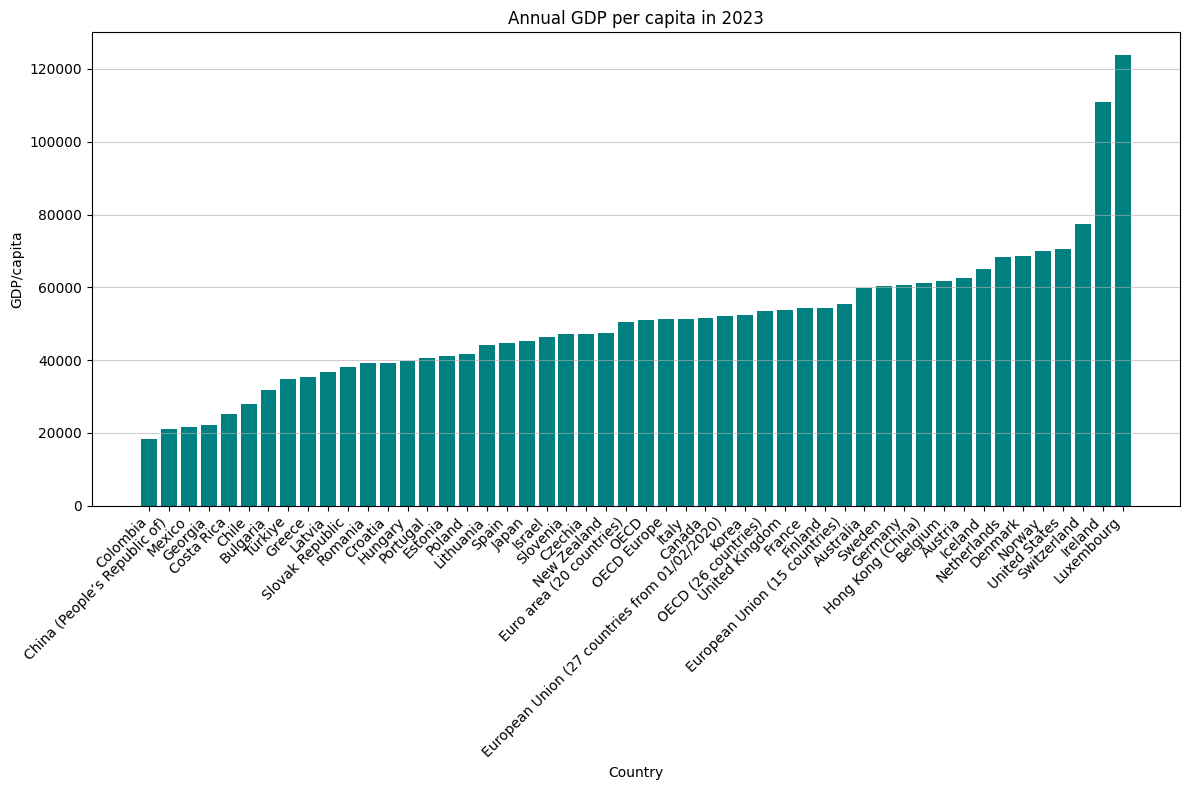

In [34]:
gdp_data = get_gdp_data()
countries = gdp_data["country"].unique().tolist()

print(countries)

bar_plot(country_names=countries,
         data=get_gdp_data(),
         value_column="GDP/capita",
         year=2023,
         title="Annual GDP per capita in 2023",
         y_label="GDP/capita"
)

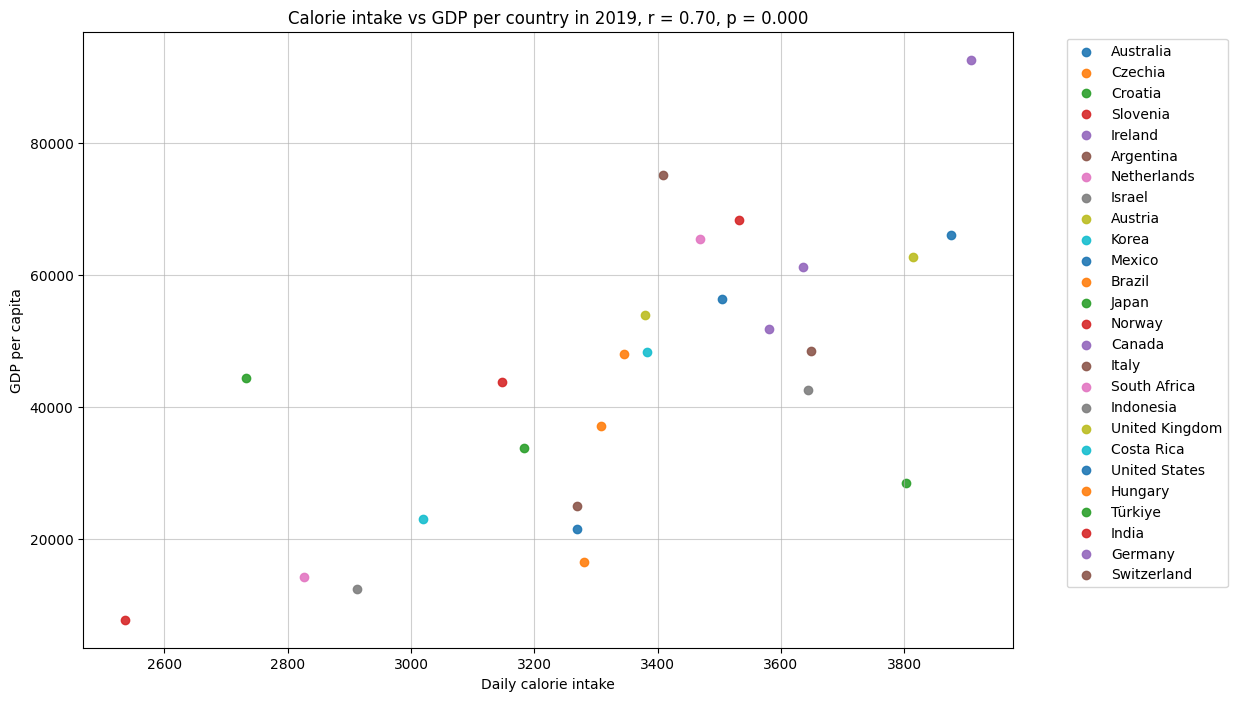

In [41]:
countries = ["Austria", "Australia", "Slovenia", "Czechia", "Croatia", "Ireland", "Argentina", "Netherlands","Israel",
             "Korea", "Mexico", "Brazil", "Japan", "Norway", "Canada", "Italy", "South Africa", "Indonesia",
             "United Kingdom", "Costa Rica", "United States", "Hungary", "Türkiye", "India", "Germany", "Switzerland"]
scatter_plot(data=merge_df(data1=get_calorie_data(), data2=get_gdp_data()),
             year=2019,
             country_names=countries,
             x_column="kcal/person",
             y_column="GDP/capita",
             hue="country",
             title="Calorie intake vs GDP per country in 2019",
             x_label="Daily calorie intake",
             y_label="GDP per capita"
)